In [58]:
import matplotlib.pyplot as plot
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import datetime as dt
import math
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time

In [59]:
path = r'%s' % os.getcwd().replace('\\','/')
path

'/data/home/coreconnect/notebooks/coreconnect/CoreConnectML/Data/Output'

In [60]:
start = time.time()

# Directory where the data (csvs) are, be sure to change to match your personal directory
dir_ = path 

print(dir_)

# Global counter to sort through stock data files
file_counter_ = 1

# Change the working directory to where the data sits
os.chdir(dir_)

# Supress max figure creation warning
plot.rcParams.update({'figure.max_open_warning': 0})

/data/home/coreconnect/notebooks/coreconnect/CoreConnectML/Data/Output


In [61]:
# Function to calculate the True Range in each row
def calc_true_range_(row):

    high_ = row['High']
    low_ = row['Low']
    open_ = row['Open']
    close_ = row['Close']
    volume_ = row['Volume']
    prev_close_ = row['Prev Close']

    max_1_ = high_ - low_
    max_2_ = abs(high_ - prev_close_)
    max_3_ = abs(low_- prev_close_)

    TR_ = max(max_1_,max_2_,max_3_)

    return TR_

In [62]:
dir_ = "/data/home/coreconnect/notebooks/coreconnect/CoreConnectML/Data"

# Global counter to sort through stock data files
file_counter_ = 1

# Change the working directory to where the data sits
os.chdir(dir_)

# Loop through the directory to ingest each file
for file_ in os.listdir(dir_):
    if file_.endswith('.csv'):
        # Read the csv
        df_stocks_temp_ = pd.read_csv(file_)
        # Grab the ticker
        df_stocks_temp_['Ticker'] = file_.split(".")[0]
        # Populate the previous close
        df_stocks_temp_['Prev Close'] = df_stocks_temp_['Close'].shift(1)
        # Calculate the True Range for each row for the ATR calculation
        df_stocks_temp_['Prev Close'] = df_stocks_temp_['Prev Close'].fillna(method='bfill')
        df_stocks_temp_['TR'] = df_stocks_temp_.apply(calc_true_range_,axis=1)
        # Calculate the ATR
        df_stocks_temp_['ATR'] = df_stocks_temp_['TR'].ewm(span=14).mean()
        # Drop the TR column
        df_stocks_temp_.drop(['TR'], axis = 1)
        # Calculate RSI here 
        # Calculate the difference between the close prices
        df_delta_= df_stocks_temp_['Close'].diff()
        # Copy the delta to two different data frames
        df_dUp_, df_dDown_ = df_delta_.copy(),df_delta_.copy()
        # Find those deltas less than zero and drop then 
        df_dUp_[df_delta_<0] = 0
        # find those deltas greater than zerp and drop them
        df_dDown_[df_delta_>0] = 0

        roll_up_ = df_dUp_.rolling(14).mean()
        roll_down_ = df_dDown_.rolling(14).mean().abs()

        RS_ = roll_up_/roll_down_

        RSI_ = 100.0 - (100.0 / (1.0 + RS_))

        df_stocks_temp_['RSI'] = RSI_

        df_stocks_temp_['RSI'] = df_stocks_temp_['RSI'].fillna(method='bfill')

        # If the master data frame is being initialized then populate
        if file_counter_ == 1:
            df_stocks_ = df_stocks_temp_
        # Else append dataframe
        else:
            df_stocks_ = df_stocks_.append(df_stocks_temp_)
        # Clear temp dataframe
        df_stocks_temp_ = df_stocks_temp_.iloc[0:0]

        # Increment file count
        file_counter_ += 1

In [63]:
# Reset the dataframe index
df_stocks_ = df_stocks_.set_index(['Date','Ticker'])
# Sort dataframe by date
df_stocks_ = df_stocks_.sort_values('Date')

# Get all the unique tickers 
unique_stocks_ = df_stocks_.index.levels[1]

#df_stocks_.to_csv("Test.csv", index = True)

AA ATR R2 Score =  0.4046571012060938
AA RSI R2 Score =  0.05201378702047832
AAPL ATR R2 Score =  0.36128839030336724
AAPL RSI R2 Score =  0.01038539591359966
AEO ATR R2 Score =  0.45371231997143535
AEO RSI R2 Score =  0.03390783548626153
AMZN ATR R2 Score =  0.5547990088851282
AMZN RSI R2 Score =  0.011074816849601543
BA ATR R2 Score =  0.7126246613359989
BA RSI R2 Score =  0.0030272143504277427
BAC ATR R2 Score =  0.3921492919543476
BAC RSI R2 Score =  0.006813304965920364
BP ATR R2 Score =  0.01281697227471812
BP RSI R2 Score =  0.008675756899817588
DCP ATR R2 Score =  0.0031026889702097105
DCP RSI R2 Score =  0.009888440549741917
DIS ATR R2 Score =  0.11448136604580694
DIS RSI R2 Score =  0.054132208439250595
DJI ATR R2 Score =  0.13434940674120488
DJI RSI R2 Score =  0.01905924997273567
DPZ ATR R2 Score =  0.7778915082616856
DPZ RSI R2 Score =  0.005486949230514293
F ATR R2 Score =  0.06013049959298511
F RSI R2 Score =  0.02393467754684009
FB ATR R2 Score =  0.31610750689723255
FB

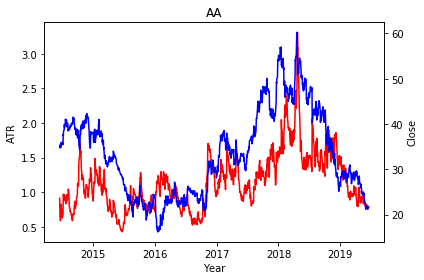

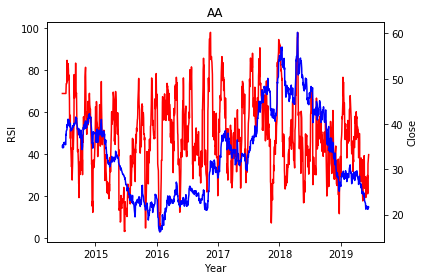

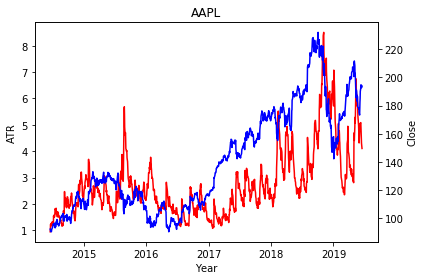

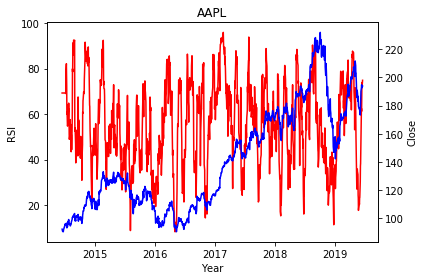

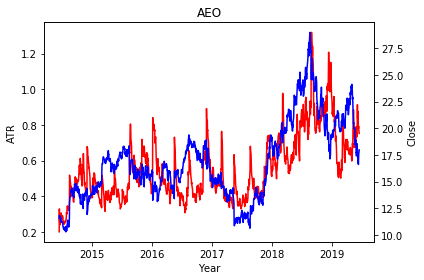

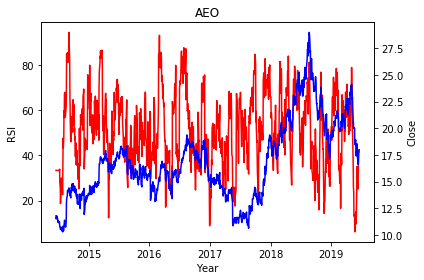

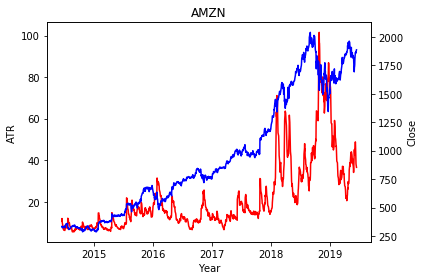

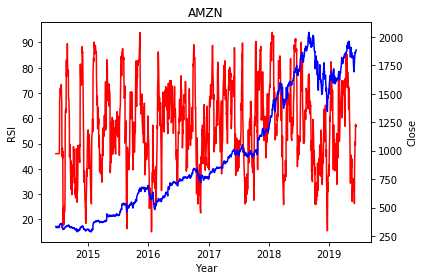

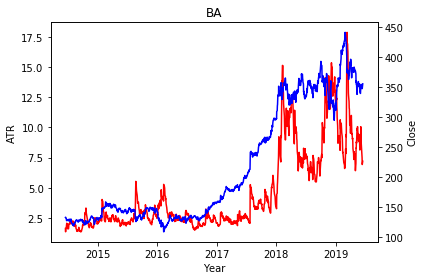

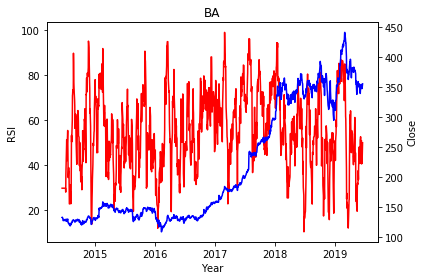

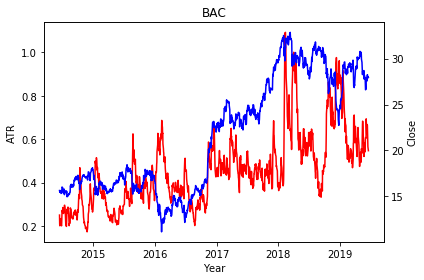

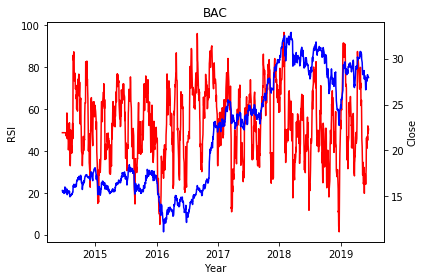

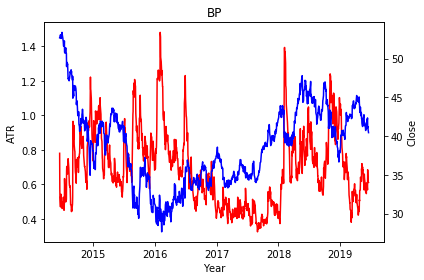

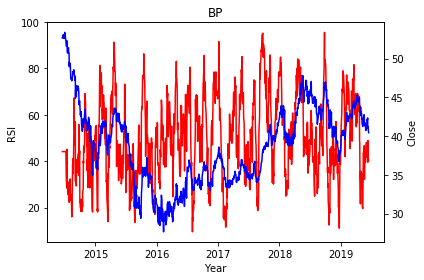

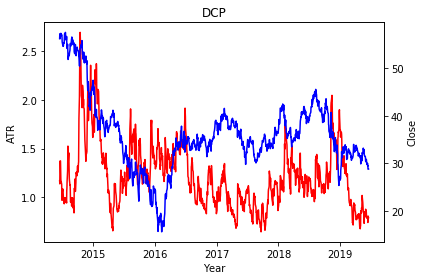

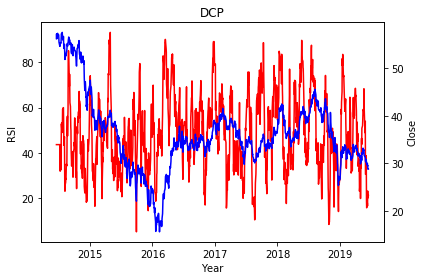

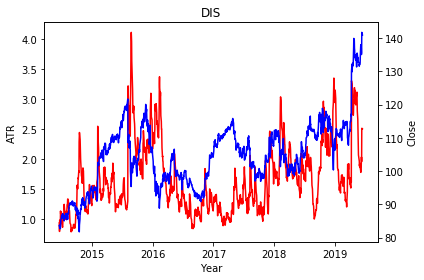

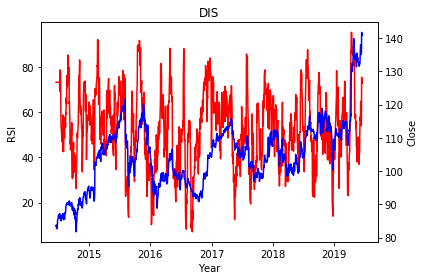

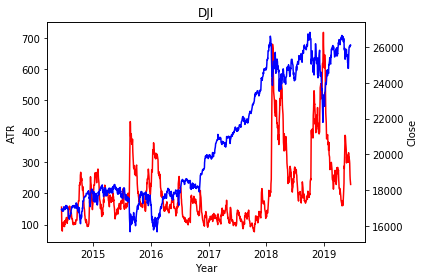

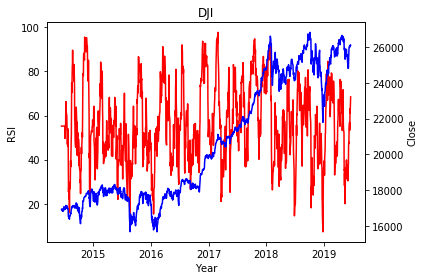

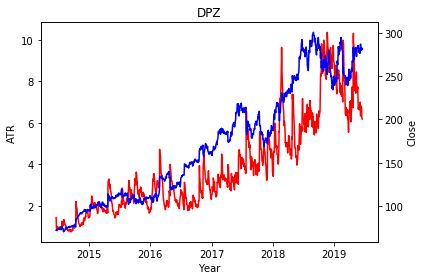

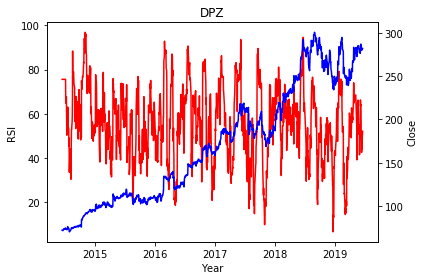

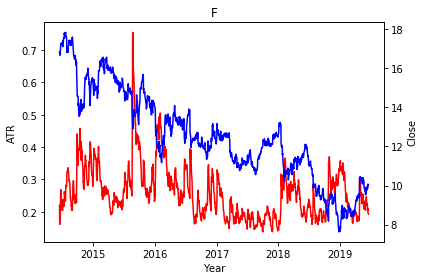

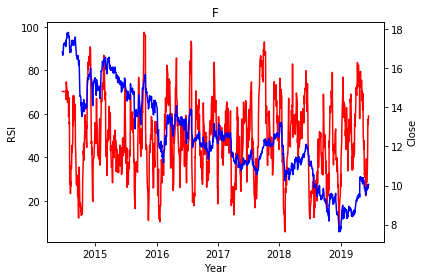

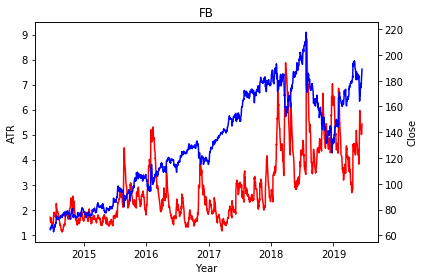

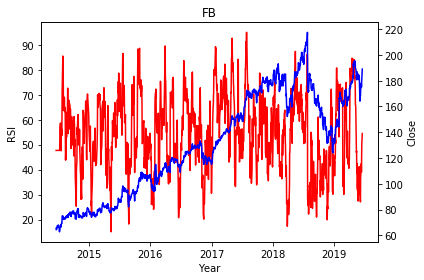

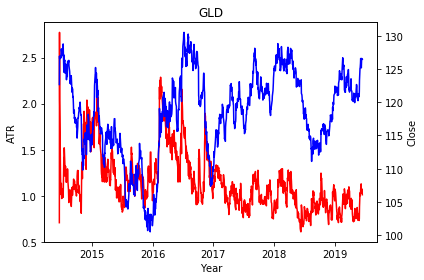

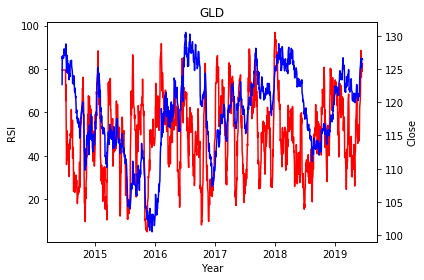

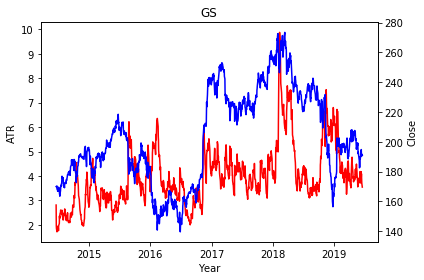

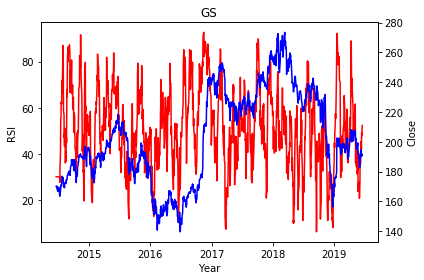

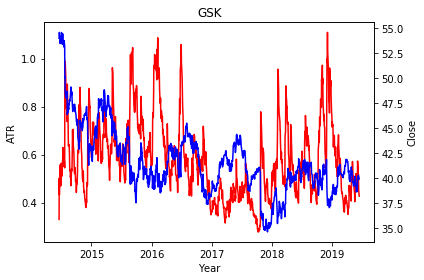

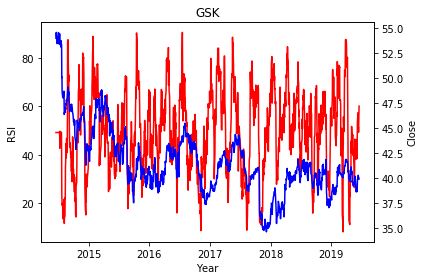

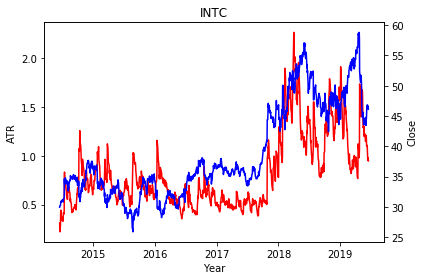

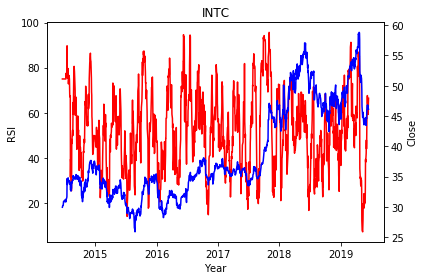

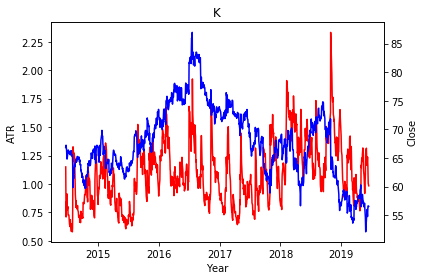

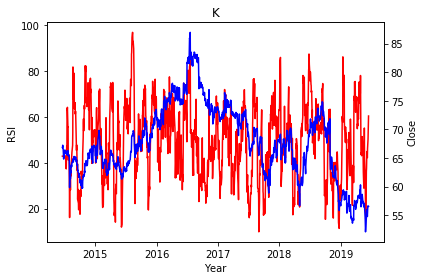

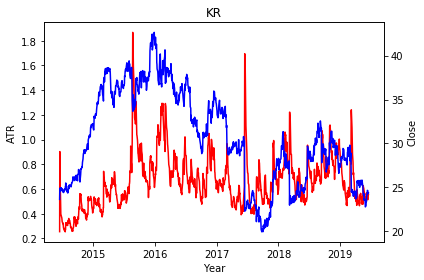

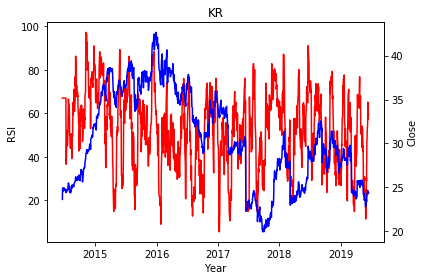

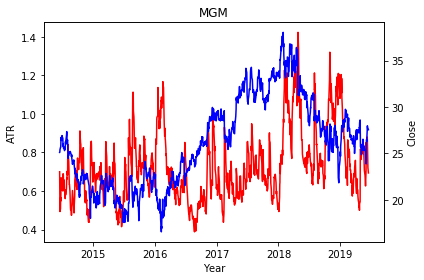

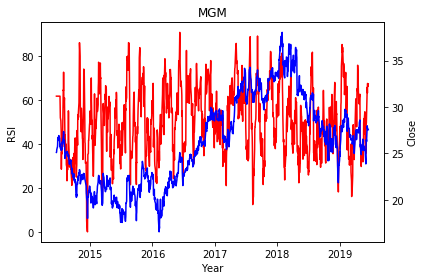

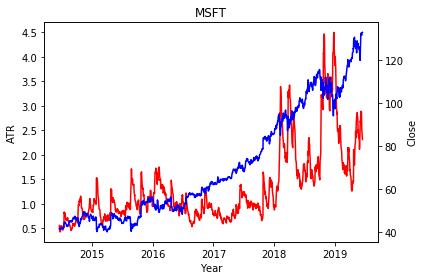

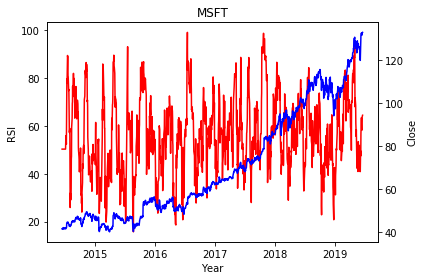

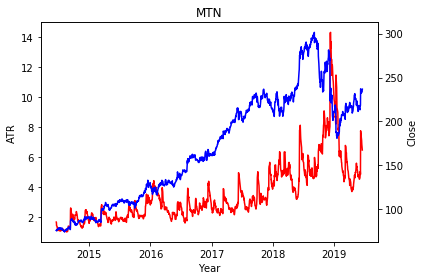

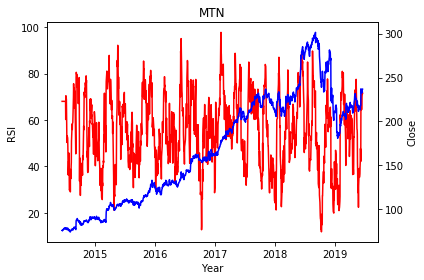

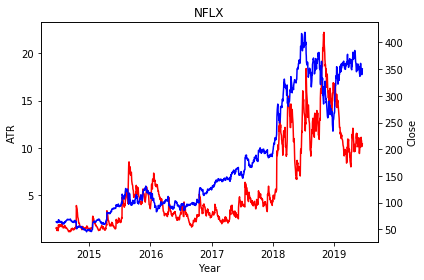

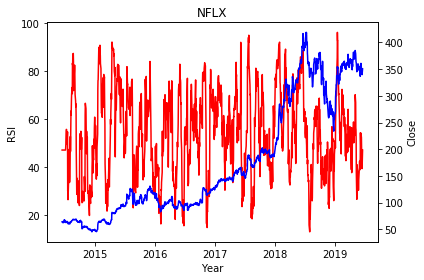

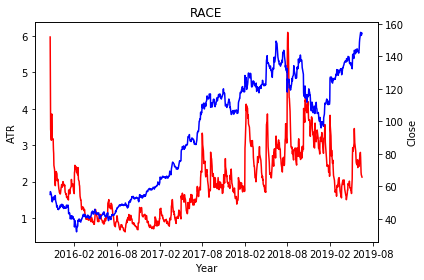

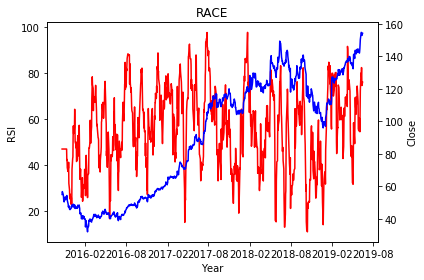

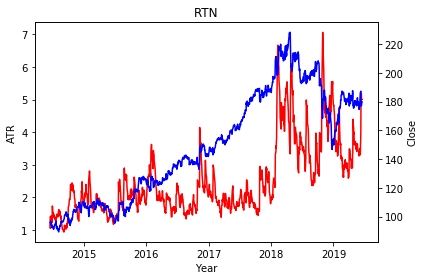

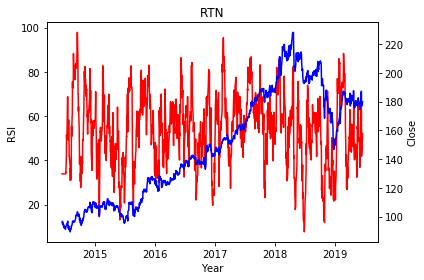

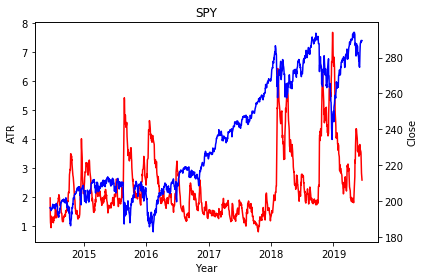

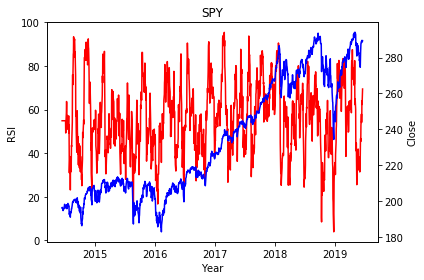

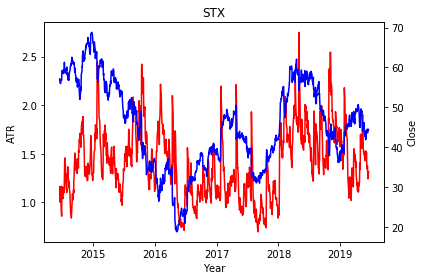

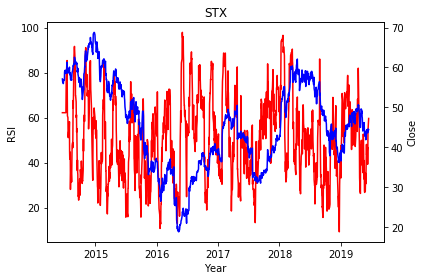

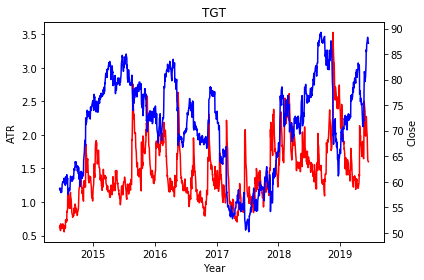

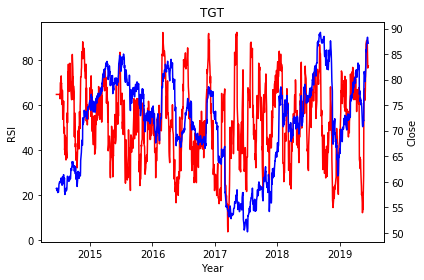

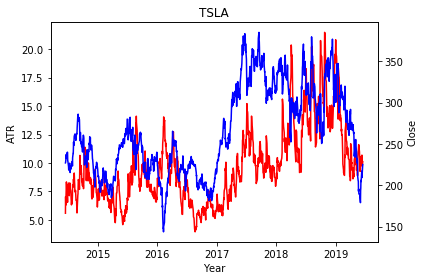

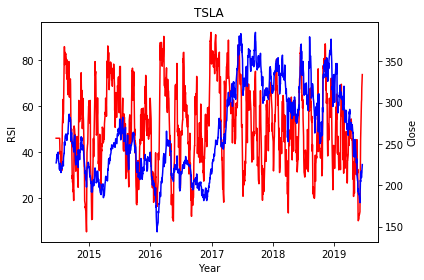

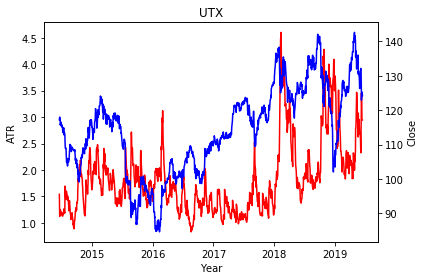

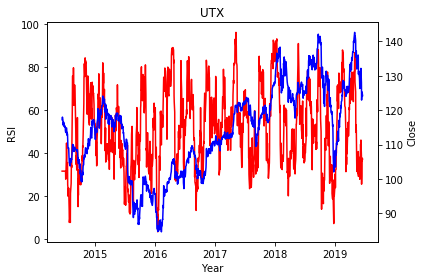

In [64]:
for stock_ in unique_stocks_:
    df_data_ = df_stocks_[df_stocks_.index.get_level_values(1) == stock_]
    df_data_ = df_data_.reset_index()
    df_data_['Date'] = pd.to_datetime(df_data_['Date'])
    df_data_['Ticker'] = df_data_['Ticker'].astype(str)
    ticker_ = str(df_data_['Ticker'][0])

    x_ = df_data_['ATR']
    y_ = df_data_['Close']

    fig, ax1_ = plot.subplots()
    ax1_.set_xlabel('Year')
    ax1_.set_ylabel('ATR')
    ax1_.plot(df_data_['Date'],df_data_['ATR'],color='red')
    ax1_.set_title(ticker_)

    ax2_ = ax1_.twinx()

    ax2_.set_ylabel('Close')
    ax2_.plot(df_data_['Date'],df_data_['Close'],color='blue')

    fig.tight_layout()
    dir_ = '/data/home/coreconnect/notebooks/coreconnect/CoreConnectML/Data/Chart'
    os.chdir(dir_)
    plot.savefig(ticker_+'_ATR.png')

    x_train_,x_test_,y_train_,y_test_ = train_test_split(x_,y_, test_size =.5)

    LinearRegressor_ = linear_model.LinearRegression()

    LinearRegressor_.fit(x_.values.reshape(-1,1),y_.values.reshape(-1,1))

    prediction_ = LinearRegressor_.predict(x_.values.reshape(-1,1))

    df_data_['Prediction_ATR'] = prediction_

    print(ticker_+" ATR R2 Score = ",LinearRegressor_.score(x_.values.reshape(-1,1),y_.values.reshape(-1,1)))

    x_ = df_data_['RSI']
    y_ = df_data_['Close']

    fig, ax1_ = plot.subplots()
    ax1_.set_xlabel('Year')
    ax1_.set_ylabel('RSI')
    ax1_.plot(df_data_['Date'],df_data_['RSI'],color='red')
    ax1_.set_title(ticker_)

    ax2_ = ax1_.twinx()

    ax2_.set_ylabel('Close')
    ax2_.plot(df_data_['Date'],df_data_['Close'],color='blue')

    fig.tight_layout()
    plot.savefig(ticker_+'_RSI.png')

    x_train_,x_test_,y_train_,y_test_ = train_test_split(x_,y_, test_size =.5)

    LinearRegressor_ = linear_model.LinearRegression()

    LinearRegressor_.fit(x_.values.reshape(-1,1),y_.values.reshape(-1,1))

    prediction_ = LinearRegressor_.predict(x_.values.reshape(-1,1))

    df_data_['Prediction_RSI'] = prediction_

    print(ticker_+" RSI R2 Score = ",LinearRegressor_.score(x_.values.reshape(-1,1),y_.values.reshape(-1,1)))

    dir_ = '/data/home/coreconnect/notebooks/coreconnect/CoreConnectML/Data/Output'
    os.chdir(dir_)

    df_data_.to_csv(ticker_+"_output.csv", index = True)


In [65]:
end = time.time()
print("Execution time:", end - start)

Execution time: 21.52438259124756


In [66]:
import psutil
# gives a single float value
psutil.cpu_percent()
# gives an object with many fields
psutil.virtual_memory()
# you can convert that object to a dictionary 
dict(psutil.virtual_memory()._asdict())

{'active': 1327751168,
 'available': 6017568768,
 'buffers': 171360256,
 'cached': 1534115840,
 'free': 4639232000,
 'inactive': 867655680,
 'percent': 17.4,
 'shared': 9379840,
 'slab': 250851328,
 'total': 7284129792,
 'used': 939421696}